# Wine Quality Classification

**In this module we will classify wine bottles into 3 grade classes according to their quality**

In [ ]:
# Importing computational packages
import numpy as np
import pandas as pd
import io

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the datasets
from google.colab import files
uploaded = files.upload()


Saving redwine.csv to redwine.csv


In [ ]:
import io

In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['redwine.csv']))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Grade                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,B
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,B


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Checking for the missing value present in each columns
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Grade
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset["Grade"].value_counts()

B    1319
A     217
C      63
Name: Grade, dtype: int64

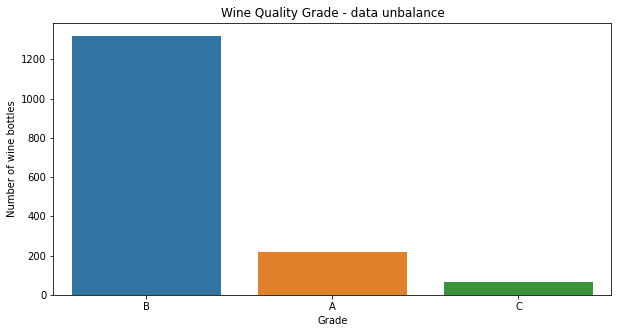

In [ ]:
# Visualization of training data

plt.figure(figsize=(10,5))
sns.countplot(dataset["Grade"])
plt.ylabel("Number of wine bottles")
plt.xlabel("Grade")
plt.title("Wine Quality Grade - data unbalance")
plt.show()

In [ ]:
#Observe the distribution of our classes
classes=dataset['Grade'].value_counts()
grade_A = round(classes[0] / dataset['Grade'].count()*100,2)
grade_B = round(classes[1] / dataset['Grade'].count()*100, 2)
grade_C = round(classes[2] / dataset['Grade'].count()*100, 2)
grade_A, grade_B, grade_C

(82.49, 13.57, 3.94)

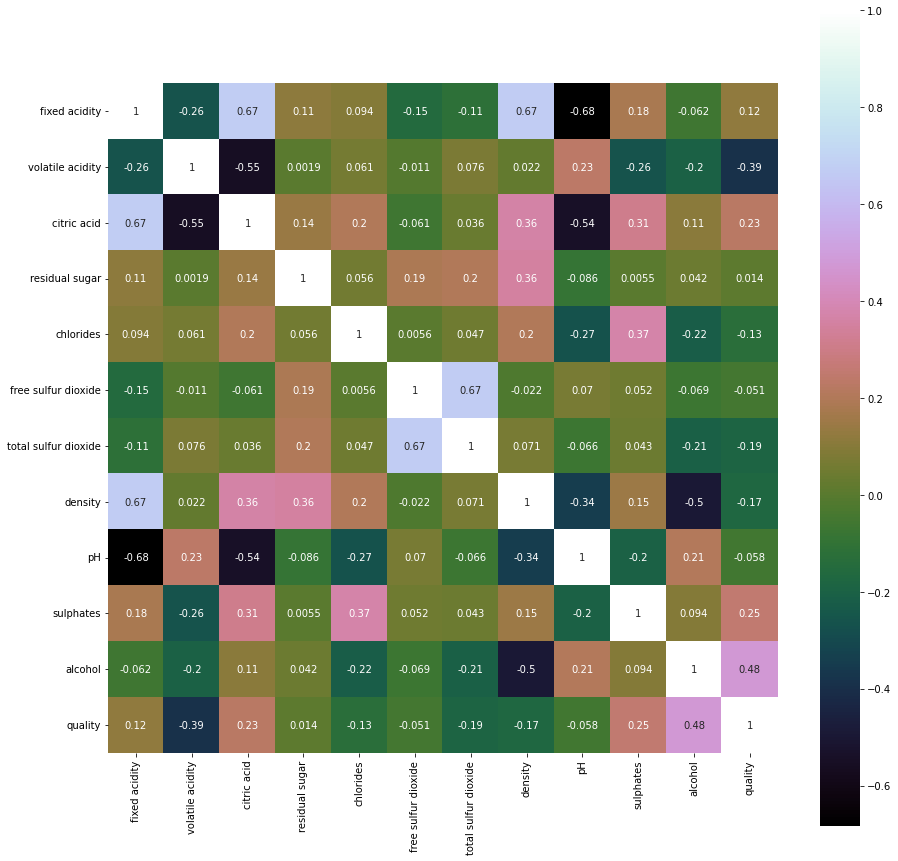

In [ ]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='cubehelix', square=True, ax=ax,annot=True)
plt.show()

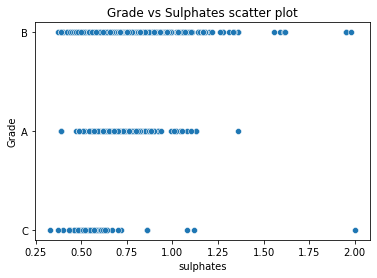

In [ ]:
# Create a scatter plot to observe the distribution of classes with sulphates
sns.scatterplot(dataset["sulphates"], dataset["Grade"])
plt.title("Grade vs Sulphates scatter plot")
plt.show()

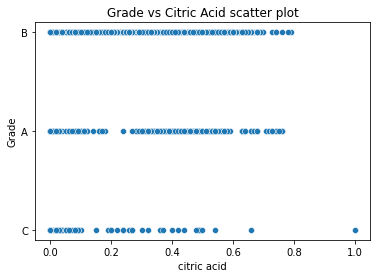

In [ ]:
# Create a scatter plot to observe the distribution of classes with citric acid
sns.scatterplot(dataset["citric acid"], dataset["Grade"])
plt.title("Grade vs Citric Acid scatter plot")
plt.show()

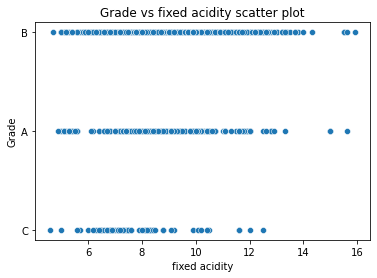

In [ ]:
# Create a scatter plot to observe the distribution of classes with fixed acidity
sns.scatterplot(dataset["fixed acidity"], dataset["Grade"])
plt.title("Grade vs fixed acidity scatter plot")
plt.show()

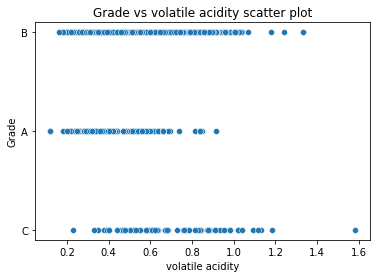

In [ ]:
# Create a scatter plot to observe the distribution of classes with volatile acidity
sns.scatterplot(dataset["volatile acidity"], dataset["Grade"])
plt.title("Grade vs volatile acidity scatter plot")
plt.show()

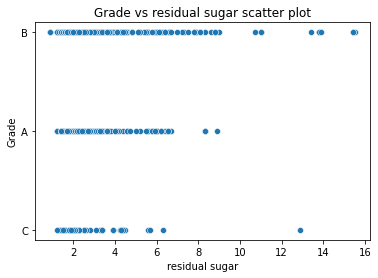

In [ ]:
# Create a scatter plot to observe the distribution of classes with residual sugar
sns.scatterplot(dataset["residual sugar"], dataset["Grade"])
plt.title("Grade vs residual sugar scatter plot")
plt.show()

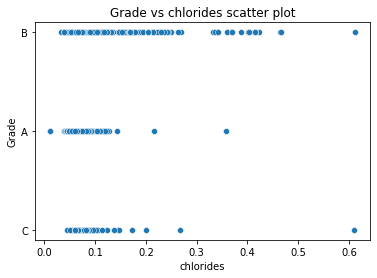

In [ ]:
# Create a scatter plot to observe the distribution of classes with chlorides
sns.scatterplot(dataset["chlorides"], dataset["Grade"])
plt.title("Grade vs chlorides scatter plot")
plt.show()

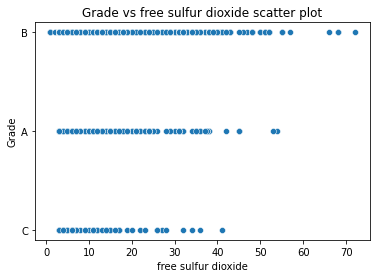

In [ ]:
# Create a scatter plot to observe the distribution of classes with free sulfur dioxide
sns.scatterplot(dataset["free sulfur dioxide"], dataset["Grade"])
plt.title("Grade vs free sulfur dioxide scatter plot")
plt.show()

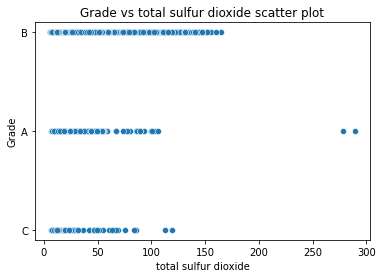

In [ ]:
# Create a scatter plot to observe the distribution of classes with total sulfur dioxide
sns.scatterplot(dataset["total sulfur dioxide"], dataset["Grade"])
plt.title("Grade vs total sulfur dioxide scatter plot")
plt.show()

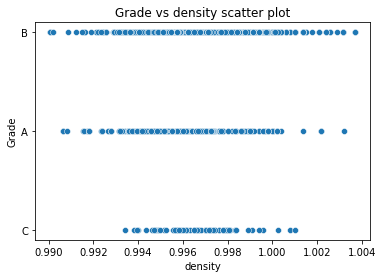

In [ ]:
# Create a scatter plot to observe the distribution of classes with density
sns.scatterplot(dataset["density"], dataset["Grade"])
plt.title("Grade vs density scatter plot")
plt.show()

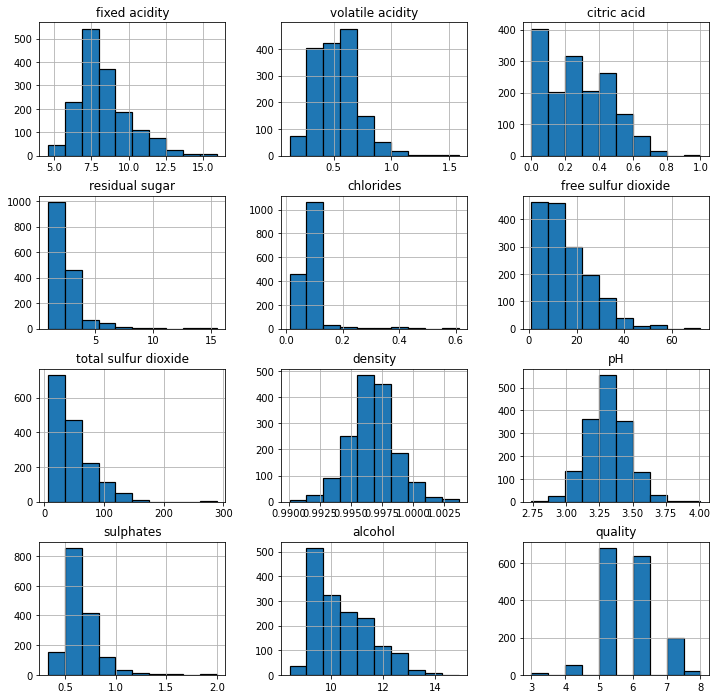

In [ ]:
# Create a histogram to observe the distribution of data and outliers
dataset.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

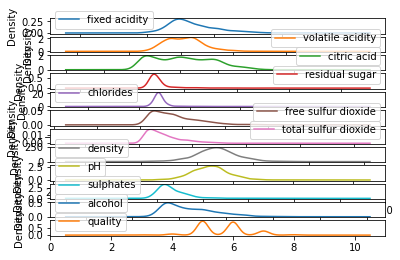

In [ ]:
# Create a scatter plot to observe the skewness of each parameter
dataset.plot(kind='density',subplots=True,sharex=False)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [50,50]
sns.pairplot(dataset,hue='Grade');

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [ ]:
train, test = train_test_split(dataset, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
train_X = train.iloc[:,:-1]
train_y = train.Grade
test_X = test.iloc[:,:-1]
test_y = test.Grade
print(train.shape)
print(test.shape)

(1119, 13)
(480, 13)


In [ ]:
print(train_X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1377            5.2              0.49         0.26             2.3      0.090   
981             9.5              0.86         0.26             1.9      0.079   
681             8.0              0.45         0.23             2.2      0.094   
514            10.5              0.51         0.64             2.4      0.107   
1241            9.8              0.37         0.39             2.5      0.079   
...             ...               ...          ...             ...        ...   
645             7.8              0.64         0.10             6.0      0.115   
477            10.4              0.24         0.49             1.8      0.075   
976             7.2              0.41         0.30             2.1      0.083   
7               7.3              0.65         0.00             1.2      0.065   
850             9.3              0.43         0.44             1.9      0.085   

      free sulfur dioxide  

In [ ]:
model = KNeighborsClassifier(n_neighbors=5) # this examines 5 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
knn_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of KNN is: ', knn_acc)

The accuracy of KNN is:  0.8229166666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       0.58      0.31      0.40        68
           B       0.84      0.96      0.90       388
           C       1.00      0.04      0.08        24

    accuracy                           0.82       480
   macro avg       0.81      0.44      0.46       480
weighted avg       0.81      0.82      0.79       480



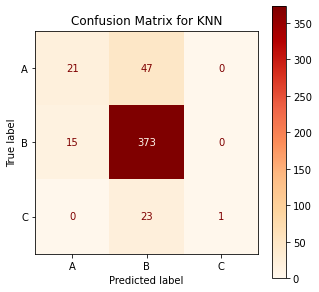

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for KNN")
plt.show()

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
decision_tree_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Decision Tree is: ', decision_tree_acc)

The accuracy of Decision Tree is:  1.0


In [ ]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        68
           B       1.00      1.00      1.00       388
           C       1.00      1.00      1.00        24

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



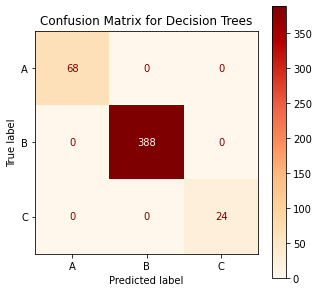

In [ ]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Decision Trees")
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
logistic_reg_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Logistic Regression is: ', logistic_reg_acc)

The accuracy of Logistic Regression is:  0.9833333333333333


In [ ]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        68
           B       0.98      1.00      0.99       388
           C       1.00      0.67      0.80        24

    accuracy                           0.98       480
   macro avg       0.99      0.89      0.93       480
weighted avg       0.98      0.98      0.98       480



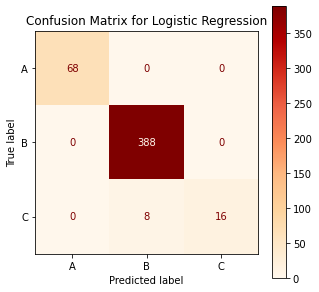

In [ ]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(train_X, train_y)
prediction = model.predict(test_X)
svm_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of SVM is: ', svm_acc)

The accuracy of SVM is:  0.9875


In [ ]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        68
           B       0.98      1.00      0.99       388
           C       1.00      0.75      0.86        24

    accuracy                           0.99       480
   macro avg       0.99      0.92      0.95       480
weighted avg       0.99      0.99      0.99       480



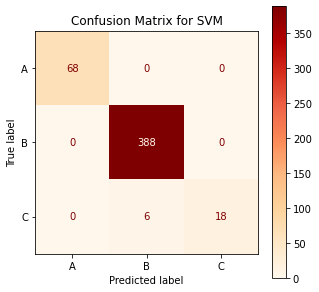

In [ ]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for SVM")
plt.show()

In [ ]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
naive_bayes_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Gaussian Naive Bayes is: ', naive_bayes_acc)

The accuracy of Gaussian Naive Bayes is:  0.9875


In [ ]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       1.00      0.97      0.99        68
           B       0.98      1.00      0.99       388
           C       1.00      0.83      0.91        24

    accuracy                           0.99       480
   macro avg       0.99      0.93      0.96       480
weighted avg       0.99      0.99      0.99       480



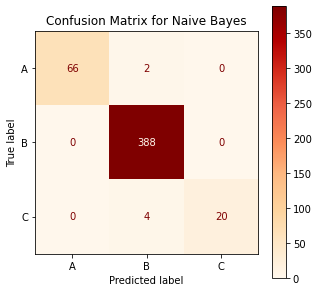

In [ ]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [ ]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
random_forest_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Random Forest is: ', random_forest_acc)

The accuracy of Random Forest is:  0.9479166666666666


In [ ]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           A       1.00      0.99      0.99        68
           B       0.94      1.00      0.97       388
           C       0.00      0.00      0.00        24

    accuracy                           0.95       480
   macro avg       0.65      0.66      0.65       480
weighted avg       0.90      0.95      0.92       480



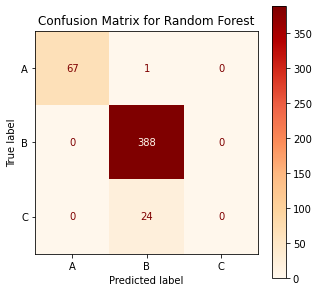

In [ ]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Random Forest")
plt.show()

Text(0, 0.5, 'Accuracy')

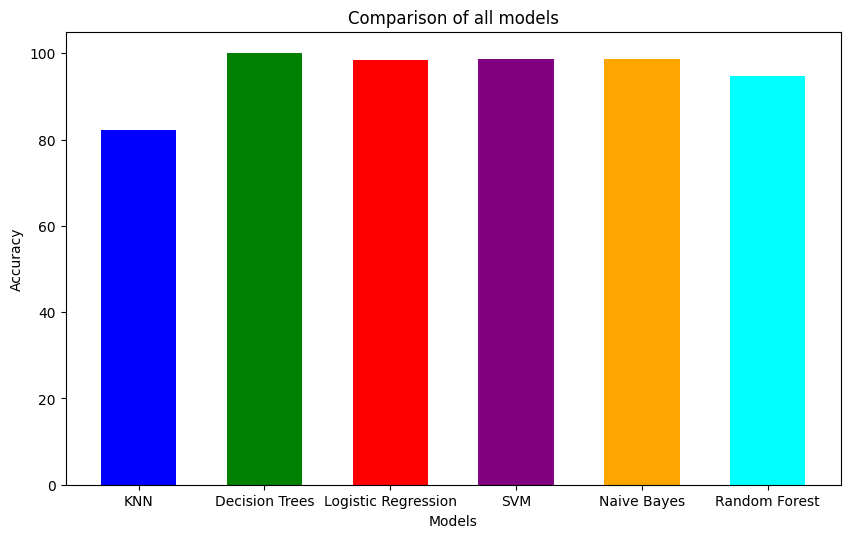

In [ ]:
#Comparison of all models
xaxis = ["KNN","Decision Trees","Logistic Regression","SVM","Naive Bayes","Random Forest"]
yaxis = [knn_acc*100, decision_tree_acc*100,logistic_reg_acc*100,svm_acc*100,naive_bayes_acc*100,random_forest_acc*100]
plt.figure(figsize=(10, 6), dpi=100)
plt.bar(xaxis,yaxis,color=['blue','green','red','purple','orange','cyan'],width=0.6)


plt.title("Comparison of all models")
plt.xlabel("Models")
plt.ylabel("Accuracy")